Current Working Directory: C:\Users\greeshma k
Accuracy: 0.9668161434977578

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



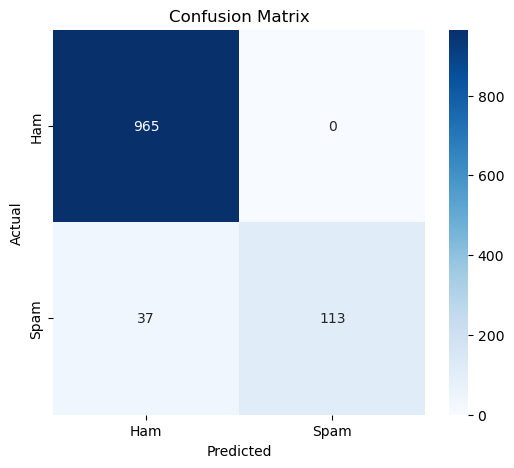

In [9]:
# Import necessary libraries
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check the current working directory
print("Current Working Directory:", os.getcwd())  # This will print the directory path

# Ensure that the 'spam.csv' file is in the same directory or specify the correct path
# Step 2: Load the dataset (provide correct path if file is in a different directory)
# The file 'spam.csv' should be in the same directory as your notebook.
file_path = 'spam.csv'  # You can update the path if needed

try:
    df = pd.read_csv(file_path, encoding='latin-1')  # Load the dataset
except FileNotFoundError:
    print("File not found! Please ensure that the 'spam.csv' file is in the correct path.")
    
# Step 3: Preprocess the dataset
# Select relevant columns and rename them for clarity
df = df[['v1', 'v2']]  # 'v1' is the label, 'v2' is the message content
df.columns = ['label', 'message']  # Rename columns to 'label' and 'message'

# Convert labels to binary format: 'ham' = 0, 'spam' = 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 4: Split the data into features (X) and target (y)
X = df['message']  # Features (messages)
y = df['label']    # Target variable (0 or 1)

# Step 5: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Convert text data into numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')  # Remove stopwords for better performance
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit on training data
X_test_tfidf = tfidf.transform(X_test)  # Transform the test data

# Step 7: Train the Naive Bayes model
model = MultinomialNB()  # Naive Bayes model for classification
model.fit(X_train_tfidf, y_train)  # Train the model on the training data

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Step 9: Evaluate the model
# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
